# Graded Project

***

## Context:

### A new football club named ‘GL United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster.Management wants to make such decisions using a data based approach. During a recent hiring drive, you were selected for the Data Science team as a data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total of 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures. The team needs 20 possible players to choose from. You have been requested to do the analysis and formulate a report in order to help the management make a decision regarding potential players.

## Dataset Description:

### The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as follows:

**fifa.csv** : data file <br>
**fifa_ variable_information.csv** : information on individual variables

***

## Load and explore data

### 1. Import the required libraries and read the dataset.

In [59]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
fifa_df = pd.read_csv('fifa.csv')
fifa_df = pd.read_csv('fifa_ variable_information.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [19]:
# Samples, shape, info of the data

print(fifa_df.head())
print(f"Shape of the dataset: {fifa_df.shape}")
print(fifa_df.info())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

### 3. Drop the columns which you think redundant for the analysis. 
#### [Hint: columns like 'Photo','Flag','Club Logo'}

In [57]:
# Drop redundant columns

columns_to_drop = ['Photo', 'Flag', 'Club Logo']
fifa_df = fifa_df.drop(columns=columns_to_drop)

## Data Cleaning and Preprocessing

### 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.

#### - Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
#### - When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000


In [20]:
# Convert "Value", "Wage", "Release Clause" to float

def convert_currency(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('M', '').replace('K', '')
        if value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('K'):
            return float(value[:-1]) * 1000
        else:
            return float(value)
    return value

for col in ['Value', 'Wage', 'Release Clause']:
    fifa_df[col] = fifa_df[col].apply(convert_currency)

### 5. Convert the column "Joined" into integer data type with keeping only the year.

In [21]:
# Convert "Joined" column into integer data type

fifa_data['Joined'] = pd.to_datetime(fifa_data['Joined']).dt.year

### 6. Convert the column "Contract Valid Until" to pandas datetime type.

In [23]:
# Convert "Contract Valid Untill" to pandas datetime type

fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'], format='mixed', dayfirst=False, errors='coerce')

print(fifa_df['Contract Valid Until'].head())

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


### 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. 

In [27]:
# Convert 'Height' to float in inches

def height_to_inches(height_str):
    if isinstance(height_str, str):
        parts = height_str.replace('"', '').split("'")
        feet = int(parts[0])
        inches = int(parts[1]) if len(parts) > 1 else 0
        return feet * 12 + inches
    return height_str

fifa_df['Height'] = fifa_df['Height'].apply(height_to_inches).astype(float)

print(fifa_df['Height'].head())

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64


### 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [28]:
# Convert 'Weight' to float

fifa_df['Weight'] = fifa_df['Weight'].str.replace('lbs', '').astype(float)

### 9. Check for the percentage of missing values and impute them with appropriate imputation techniques. 

In [30]:
# Percentage of missing values
missing_percentages = (fifa_df.isnull().sum() / len(fifa_df) * 100).sort_values(ascending=False)

print("Percentage of missing values:")
print(missing_percentages[missing_percentages > 0])

# Impute missing values
numeric_columns = fifa_df.select_dtypes(include=[np.number]).columns
fifa_df[numeric_columns] = fifa_df[numeric_columns].fillna(fifa_df[numeric_columns].median())

categorical_columns = fifa_df.select_dtypes(include=['object']).columns
fifa_df[categorical_columns] = fifa_df[categorical_columns].fillna(fifa_df[categorical_columns].mode().iloc[0])

Percentage of missing values:
Loaned From                 93.057615
Release Clause               8.590103
Joined                       8.529686
Contract Valid Until         1.587302
Club                         1.323667
Position                     0.329544
Jersey Number                0.329544
Skill Moves                  0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Body Type                    0.263635
Preferred Foot               0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
Height                       0.263635
HeadingAccuracy              0.263635
Reactions                    0.263635
Agility                      0.263635
SprintSpeed                  0.263635
Curve                        0.263635
BallControl                  0.263635
LongPassing                  0.263635
FKAccuracy                   0.263635
Volleys                      0.263635
Dribbling           

### 10. Plot the distribution of Overall rating for all the players and write your findings. 

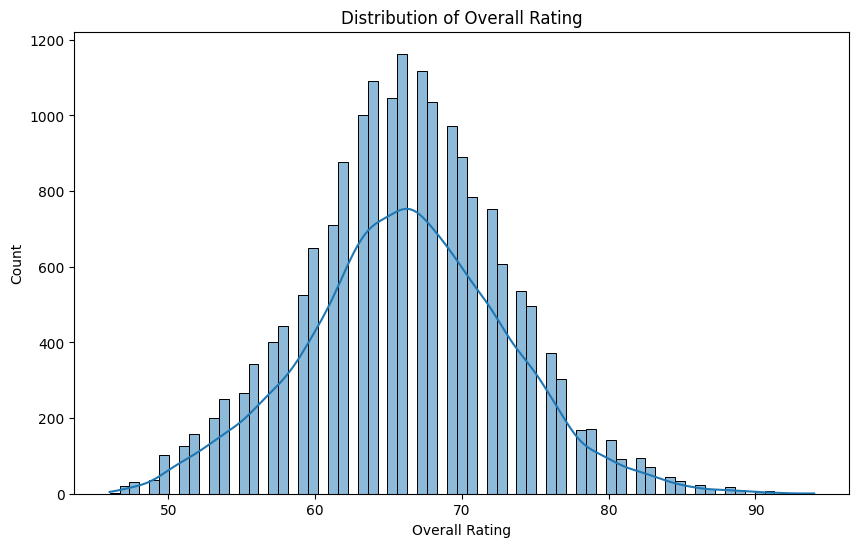

In [31]:
# Plot distribution of Overall rating

plt.figure(figsize=(10, 6))
sns.histplot(fifa_df['Overall'], kde=True)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

### 11. Retrieve the names of top20 players based on the Overall rating.

In [32]:
# Names of top 20 players based on Overall rating

top_20_players = fifa_df.nlargest(20, 'Overall')['Name'].tolist()

print("Top 20 players:", top_20_players)

Top 20 players: ['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'Sergio Ramos', 'J. Oblak', 'R. Lewandowski', 'T. Kroos', 'D. Godín', 'David Silva', 'N. Kanté', 'P. Dybala', 'H. Kane', 'A. Griezmann', 'M. ter Stegen', 'T. Courtois']


### 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [33]:
# Dataframe with all information of top 20 players

top_20_df = fifa_df.nlargest(20, 'Overall')

### 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)

In [34]:
# Average Age and Wage of top 20 players

avg_age = top_20_df['Age'].mean()
avg_wage = top_20_df['Wage'].mean()

print(f"Average Age of top 20 players: {avg_age:.2f}")
print(f"Average Wage of top 20 players: {avg_wage:.2f}")

Average Age of top 20 players: 28.30
Average Wage of top 20 players: 289.70


### 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage. 

In [35]:
# Player with highest wage among top 20

highest_wage_player = top_20_df.loc[top_20_df['Wage'].idxmax()]

print(f"Player with highest wage among top 20: {highest_wage_player['Name']}")
print(f"Wage: {highest_wage_player['Wage']}")

Player with highest wage among top 20: L. Messi
Wage: 565.0


### 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

#### i) find the average Overall rating for each club.
#### ii) Display the average overall rating of Top10 Clubs using a plot

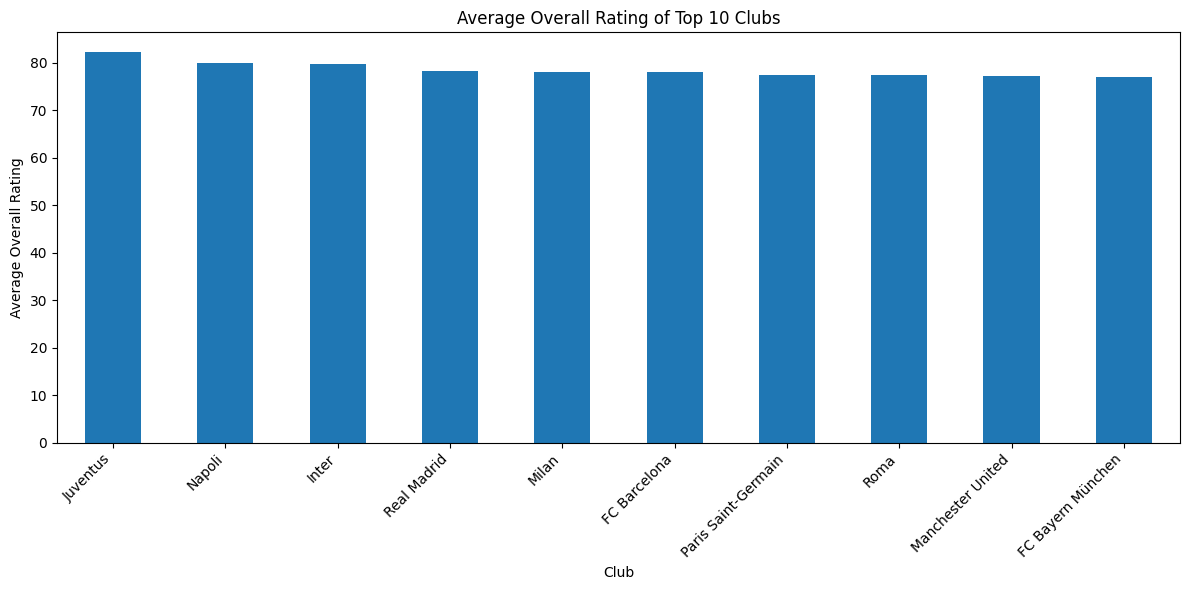

In [38]:
# Dataframe with Player name, Club Name, Wage, and Overall rating
club_df = fifa_df[['Name', 'Club', 'Wage', 'Overall']]

# i) Average Overall rating for each club
club_avg_rating = club_df.groupby('Club')['Overall'].mean().sort_values(ascending=False)

# ii) Average overall rating of Top 10 Clubs Plot
plt.figure(figsize=(12, 6))
club_avg_rating.head(10).plot(kind='bar')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. 

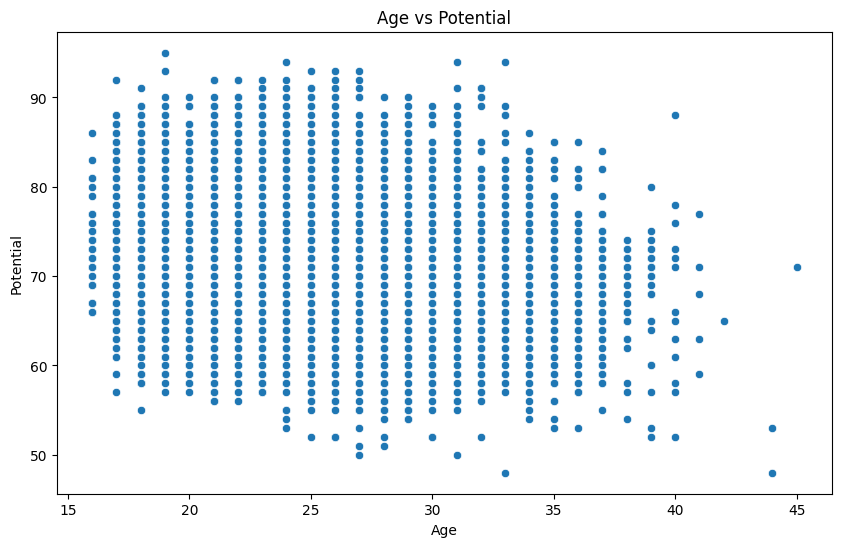

In [39]:
# Relationship between age and potential

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fifa_df, x='Age', y='Potential')
plt.title('Age vs Potential')
plt.show()

### 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric.

#### (hint: use potential, Overall, value, international reputation, and Release Clause)

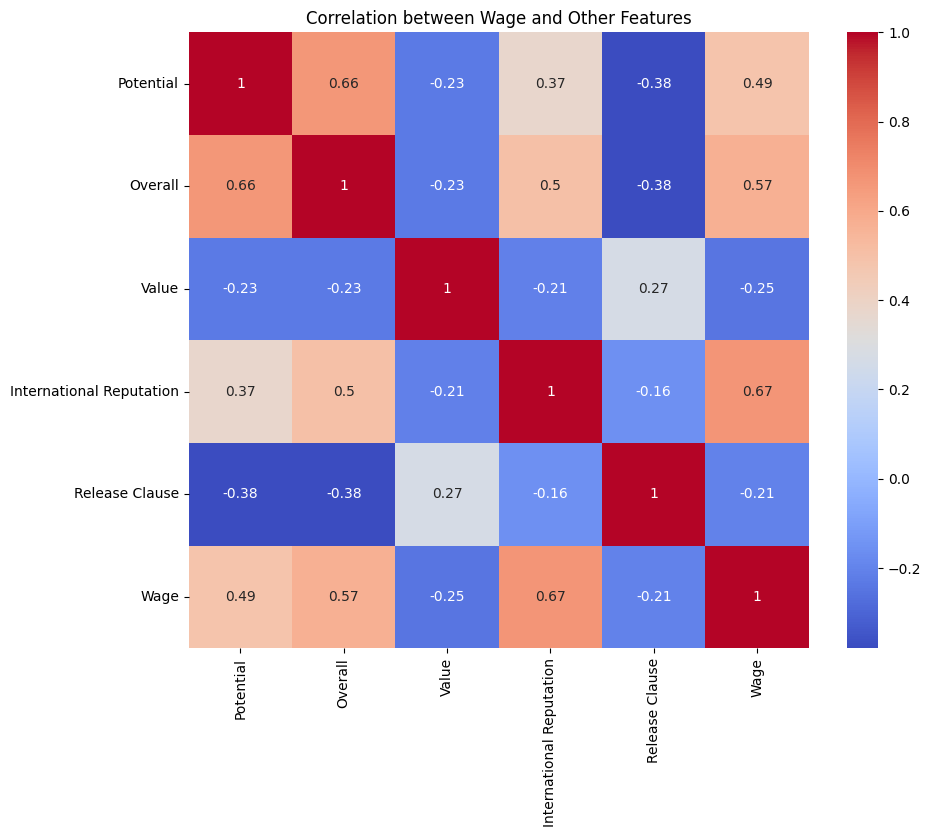

In [40]:
# Features contributing to wages

wage_features = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']
correlation_matrix = fifa_df[wage_features + ['Wage']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Wage and Other Features')
plt.show()

### 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot. 

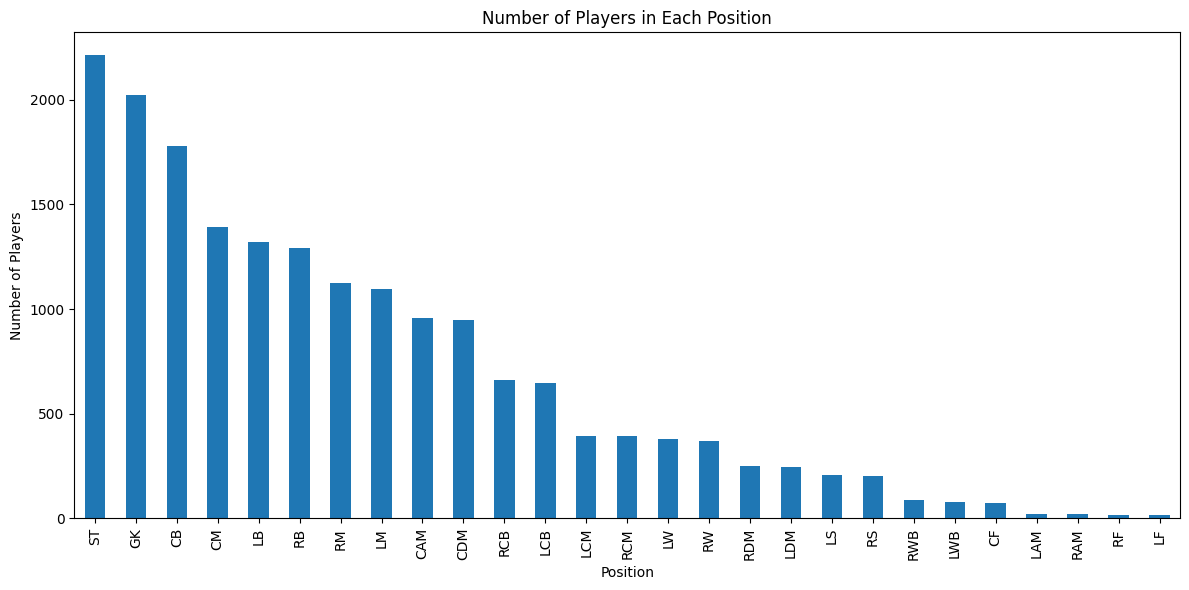

In [41]:
# Position with maximum and minimum number of players

position_counts = fifa_df['Position'].value_counts()
max_position = position_counts.index[0]
min_position = position_counts.index[-1]
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar')
plt.title('Number of Players in Each Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [55]:
# Players from Juventus with wage greater than 200K

juventus_players = fifa_df[(fifa_df['Club'] == 'Juventus') & (fifa_df['Wage'] > 200000)]
print(f"Number of Juventus players with wage greater than 200K: {len(juventus_players)}")
print(juventus_players)

Number of Juventus players with wage greater than 200K: 0
Empty DataFrame
Columns: [ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

[0 rows x 60 columns]


### 20. Generate a data frame containing top 5 players by Overall rating for each unique position.

In [58]:
# Data frame containing top 5 players by Overall rating for each unique position

top_5_by_position = (
    fifa_df.sort_values('Overall', ascending=False)
           .groupby('Position')
           .head(5)
           .reset_index(drop=True)
)

print(top_5_by_position.head(15))

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   176580          L. Suárez   31     Uruguay       91         91   
5   192985       K. De Bruyne   27     Belgium       91         92   
6   155862       Sergio Ramos   32       Spain       91         91   
7   183277          E. Hazard   27     Belgium       91         91   
8   177003          L. Modrić   32     Croatia       91         91   
9   182493           D. Godín   32     Uruguay       90         90   
10  188545     R. Lewandowski   29      Poland       90         90   
11  200389           J. Oblak   25    Slovenia       90         93   
12  182521           T. Kroos   28     Germany       90         90   
13  168542        Da

### 21. What is the average wage one can expect to pay for the top 5 players in every position? 

#### (use the data frame created in Q19)

In [49]:
# Average wage for top 5 players in every position

avg_wage_by_position = top_5_by_position.groupby('Position')['Wage'].mean().sort_values(ascending=False)
print("\nAverage wage for top 5 players in every position:")
print(avg_wage_by_position)


Average wage for top 5 players in every position:
Position
ST     294.0
LW     261.0
RCM    238.6
RCB    231.0
CDM    217.0
RW     202.0
GK     192.8
LCM    184.4
LB     177.2
LM     176.0
CAM    174.0
LCB    162.0
RB     155.4
RF     148.0
CB     139.6
LDM    135.6
RM     132.4
LS     130.6
RS     130.4
CM     123.6
LF     123.2
RDM    105.0
LAM     81.6
CF      47.4
RAM     46.4
RWB     44.2
LWB     34.2
Name: Wage, dtype: float64
